In [1]:
""" 
Author: p.wagner@bhvi.org / p.wagner@unsw.edu.au 
analyses of eye-tracking  with time of flight camera data

Data: study II
Purpose: 
- visualize data distance to point of regard and diary 

requirenments: 
- 


"""
import pandas as pd
import numpy as np
import os.path
import sys, json

import matplotlib.pyplot as plt

sys.path.append(r'C:\Users\p.wagner\Documents\Python Scripts\studyII_helpers_lib')
from studyII_helpers_lib import PoR_Data
from studyII_helpers_lib import DataAccess as get_px_meta

path_logbook = r'C:\Users\p.wagner\Documents\phd\study_II\participants'
fn_logbook = 'studyII_execution_log.xlsx' 
fp_fn_logbook = os.path.join(path_logbook, fn_logbook)

path_tracking = r'E:\PupilLabsRecordings'
# pl_info_fn = 'info.player.json'
dd_1hour_fn = 'depth_data_1hour_recording_filtered.csv'

rec_ident = ['rec_folder_free', ]
output_fp = r'E:\studyII\analyses\results_all_px'

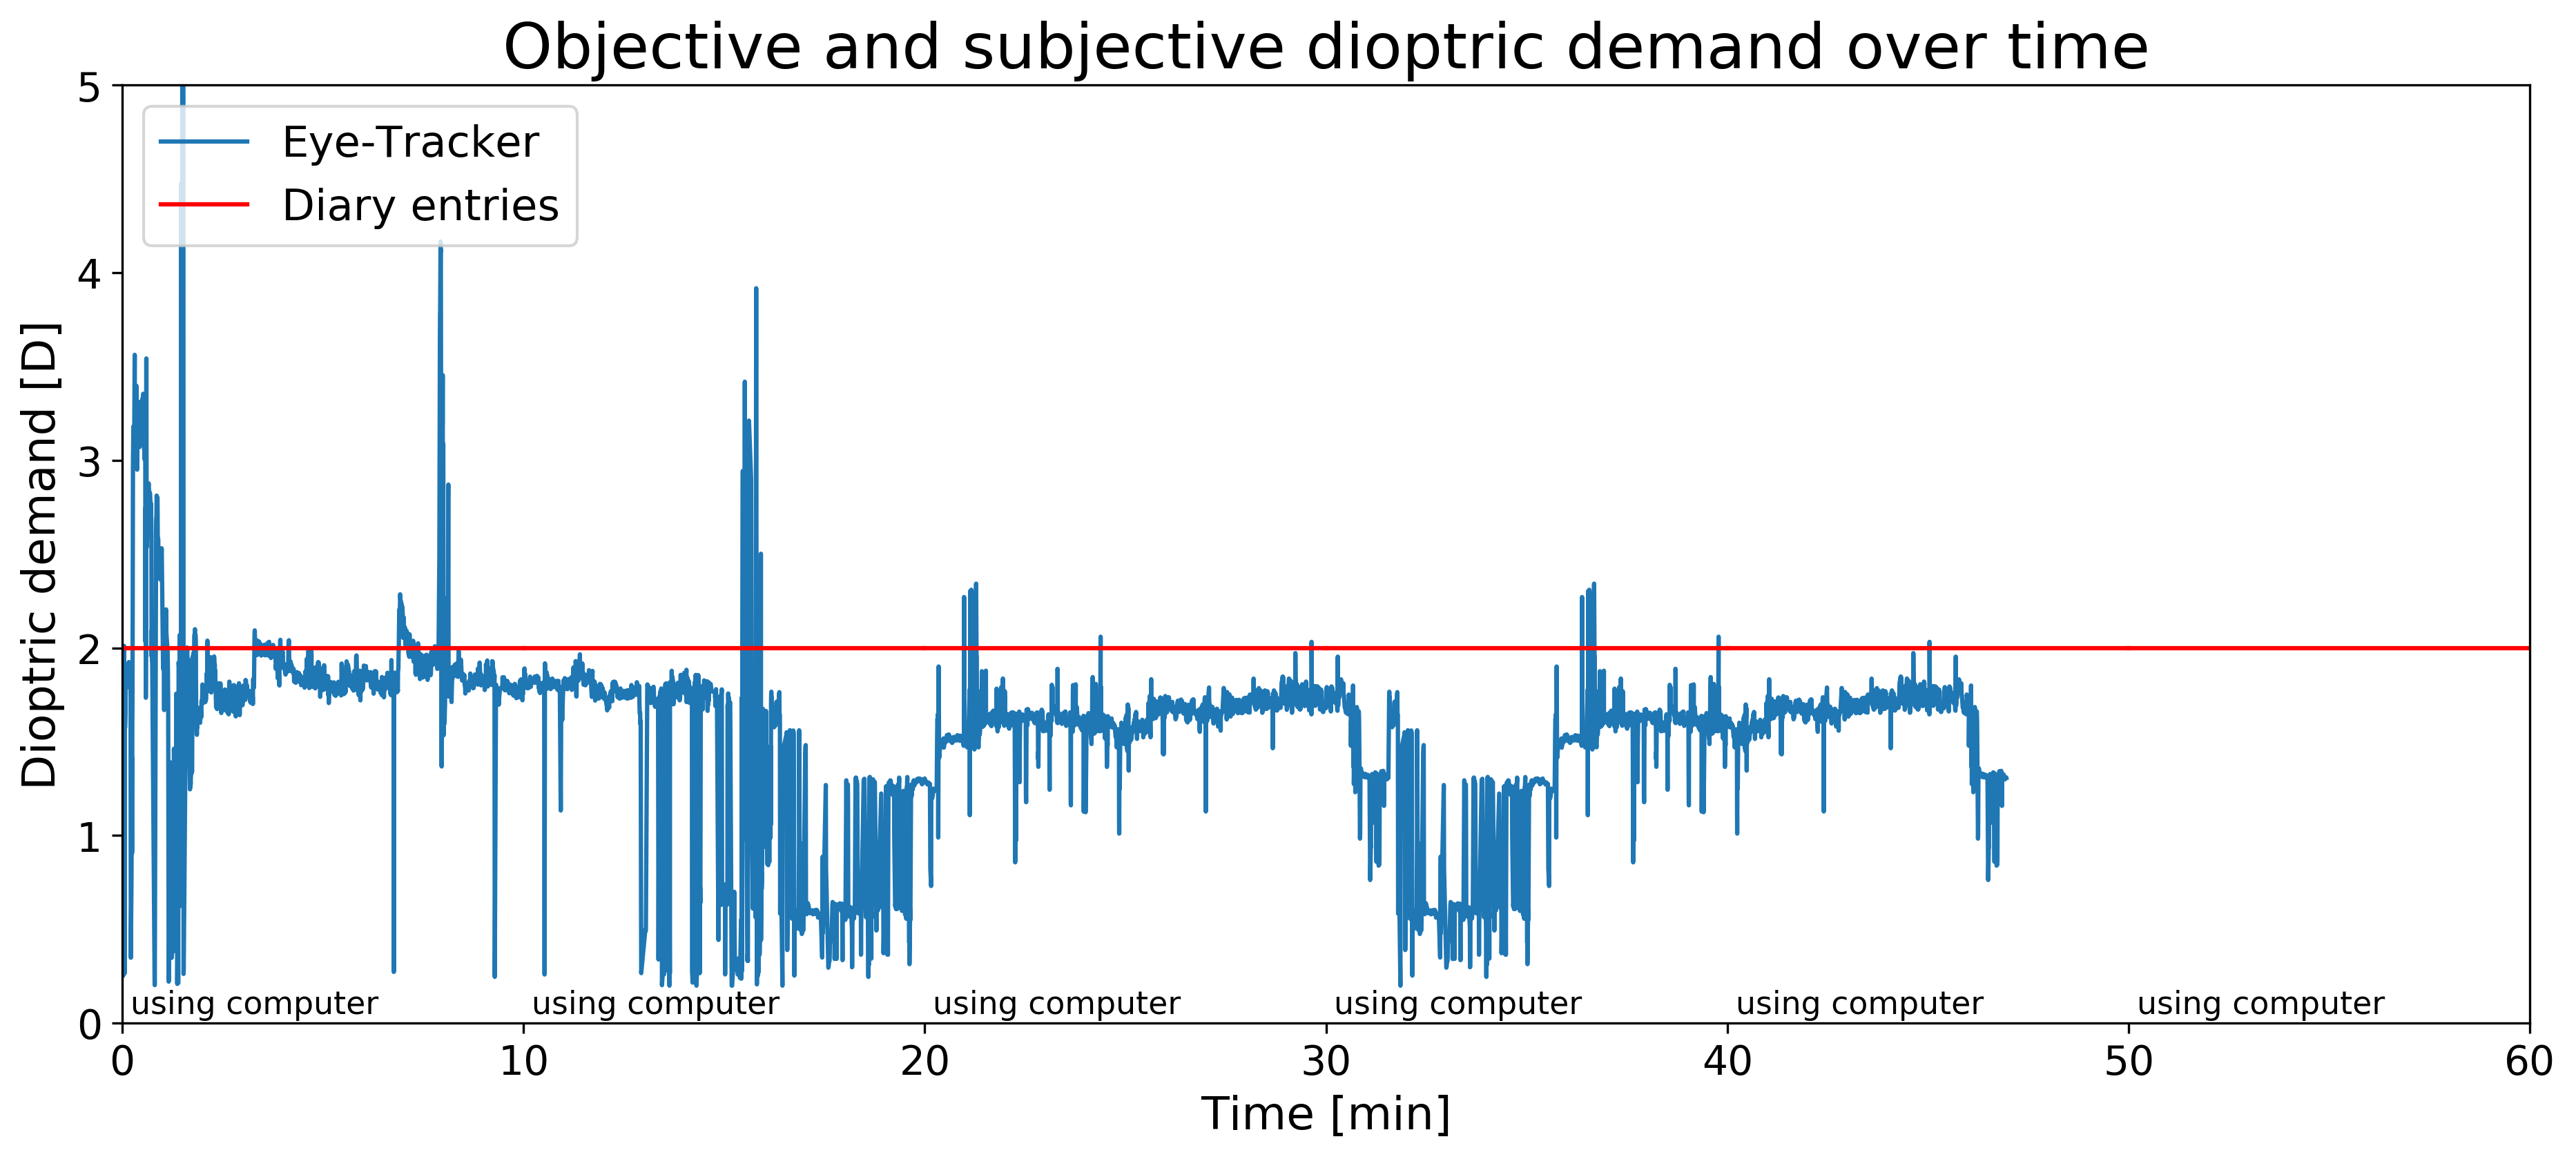

In [22]:
# find each participant data 
log_quest = pd.read_excel(fp_fn_logbook, sheet_name='questionnaire',header=None, index_col=0, engine='xlrd')
log_quest.columns = np.arange(len(log_quest.columns))

idents = ['0-10min_type', '10-20min_type', '20-30min_type', '30-40min_type', '40-50min_type', '50-60min_type' ]
px_ids = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 21,]
px_ids = 16, 
# getting overall figure 

for px_id in px_ids: 
    
    test_list = list()

    [[px_col_idx]] = np.where(log_quest.loc['px_id', :] == px_id)
    for ident in idents: 
        test = (log_quest.loc[ident, px_col_idx])
        test_list.append(test.strip()) 

    df = pd.DataFrame(columns=['type', 'time', 'D_value'] )    
    for idx, task in enumerate(test_list):
        df.loc[idx, 'type'] = task
        df.loc[idx, 'time'] = [idx*10, (idx+1) * 10]

        df.loc[idx, 'D_value'] = PoR_Data.dioptric_translation_lib(task)
        
    px_meta_data = get_px_meta(fp_fn_logbook, [px_id,], rec_ident, path_tracking)
    fpn = os.path.join(px_meta_data.px_rec_fp[0], dd_1hour_fn)
    dd_1hour = pd.read_csv(fpn)

    plt.figure(figsize=(15,6), dpi=300, facecolor='w', edgecolor='k', )

    display_data = dd_1hour #.sort_values(by=['frame_timestamp'],).reset_index()
    plt.plot(display_data.frame_timestamp /60, 1/display_data.depth_mean,) 
    # plt.plot(display_data.frame_timestamp, display_data.obj_class_DH)

    for idx in df.index:
        plt.plot(df.time[idx], [df.D_value[idx], df.D_value[idx]], 'r',)
        plt.text(df.time[idx][0] +0.2 , 0.05 , df.type[idx] , size=11)

    plt.title('Objective and subjective dioptric demand over time', size=22)
    plt.legend(['Eye-Tracker', 'Diary entries'], fontsize=15, loc='upper left' )
    plt.ylabel('Dioptric demand [D]', size=16)
    plt.xlabel('Time [min]', size=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlim([0, 60])
    plt.ylim([0, 5])

    fig_output_fn = (os.path.join(output_fp, 'px_id_' + str(px_id) + '_OBJ_vs_SUB_near_work.png'))
    output_fpn = os.path.join(output_fp, fig_output_fn)

#     plt.savefig(output_fpn, dpi=300, bbox_inches='tight')

In [23]:
# sort diary to average dioptric demand 
# go through depth_data_1hour_recording_filtered.csv record average for every 10 min 
# quality criteria min 60 data for averageing of dioptric demand 



In [24]:
# find each participant data 
log_quest = pd.read_excel(fp_fn_logbook, sheet_name='questionnaire',header=None, index_col=0, engine='xlrd')
log_quest.columns = np.arange(len(log_quest.columns))

px_ids = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 21,]
# px_ids = 16, 

columns=['px_id', 'time', 'task_type', 'D_value', 'obj_raw', 'obj_raw_n', 'obj_class', 'subj_class', 'subj_ind_estimate']
df = pd.DataFrame(columns=columns) 
    
# get diary entries for each participants and times 
for px_id in px_ids: 
    # get individual tasks     
    tasks_list = list()
    idents = ['0-10min_type', '10-20min_type', '20-30min_type', '30-40min_type', '40-50min_type', '50-60min_type' ]    
    [[px_col_idx]] = np.where(log_quest.loc['px_id', :] == px_id)
    for ident in idents: 
        task = (log_quest.loc[ident, px_col_idx])
        tasks_list.append(task.strip()) 
    # get individual estimates 
    estimates_list = []
    idents = ['0-10min_eavg', '10-20min_eavg', '20-30min_eavg', '30-40min_eavg', '40-50min_eavg', '50-60min_eavg' ]
    [[px_col_idx]] = np.where(log_quest.loc['px_id', :] == px_id)
    for ident in idents: 
        estimates_list.append( 100 / (log_quest.loc[ident, px_col_idx]))
    
    # get data file for averaging dioptric demand 
    px_meta_data = get_px_meta(fp_fn_logbook, [px_id,], rec_ident, path_tracking)
    fpn = os.path.join(px_meta_data.px_rec_fp[0], dd_1hour_fn)
    dd_1hour = pd.read_csv(fpn)

    df_new = pd.DataFrame(columns=columns) 
    for idx, task in enumerate(tasks_list):
        df_new.loc[idx, 'px_id'] = px_id
        df_new.loc[idx, 'task_type'] = task
        df_new.loc[idx, 'time'] = [idx*10, (idx+1) * 10]
        df_new.loc[idx, 'D_value'] = PoR_Data.dioptric_translation_lib(task)
        # objective data 
        dd_ = dd_1hour.loc[(dd_1hour.frame_timestamp >= idx*600) & 
                                         (dd_1hour.frame_timestamp < (idx+1)*600), :]
        df_new.loc[idx, 'obj_raw'] = np.mean(1 / dd_['depth_mean'])
        df_new.loc[idx, 'obj_raw_n'] = len(dd_['depth_mean'])
        
        dd_['obj_class_DH'] = np.nan
        dd_.loc[dd_['depth_mean'] >=  1 , 'obj_class_DH'] = 0
        dd_.loc[dd_['depth_mean'] < 1   , 'obj_class_DH'] = 1
        dd_.loc[dd_['depth_mean'] < 0.8 , 'obj_class_DH'] = 2
        dd_.loc[dd_['depth_mean'] < 0.5 , 'obj_class_DH'] = 3
        
        df_new.loc[idx, 'obj_class'] = np.nanmean(dd_.obj_class_DH)
        
        
        # subjective data
        df_new.loc[idx, 'subj_class'] = PoR_Data.dioptric_translation_lib(task)
        df_new.loc[idx, 'subj_ind_estimate'] = estimates_list[idx]
    
    df = df.append(df_new)
df = df.reset_index(drop=True)
df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


walking task not in list
walking task not in list


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: Mean of empty slice


,px_id,time,task_type,D_value,obj_raw,obj_raw_n,obj_class,subj_class,subj_ind_estimate
0,2,"[0, 10]",using computer,2,2.13963,2245,2.50067,2,1.42857
1,2,"[10, 20]",using computer,2,2.02149,2242,2.25379,2,1.42857
2,2,"[20, 30]",using computer,2,1.77936,2235,2.01298,2,1.42857
3,2,"[30, 40]",using computer,2,1.91924,2244,2.31595,2,1.42857
4,2,"[40, 50]",using computer,2,2.04575,1521,2.32807,2,1.42857
5,2,"[50, 60]",using computer,2,2.03437,1128,2.44238,2,1.42857
6,3,"[0, 10]",walking,0,1.7971,1318,1.65781,0,1
7,3,"[10, 20]",using computer,2,3.61534,1808,2.44635,2,3.33333
8,3,"[20, 30]",using hand-held device,3,0.473865,1953,0.00665643,3,1.33333
9,3,"[30, 40]",using computer,2,0.979895,1813,0.37176,2,2.5


In [5]:
df.to_csv(os.path.join(output_fp, 'dioptre_hours_all_px_V0.6.csv'))

In [6]:
dd_1hour.columns

Index(['Unnamed: 0', 'index', 'frame_timestamp', 'gaze_ts', 'frame_idx', 'tag',
       'radius', 'mask_size_pixels', 'pixels_off_mesh', 'total_point_count',
       'valid_point_count', 'point_percentage', 'point_overexposed',
       'point_confidence', 'point_missing', 'depth_min', 'depth_mean',
       'depth_max', 'depth_stddev', 'noise_min', 'noise_mean', 'noise_max',
       'noise_stddev', 'confidence_min', 'confidence_mean', 'confidence_max',
       'confidence_stddev', 'gaze_confidence', 'depth_confidence', 'priority',
       'fixation_ident', 'obj_class_DH'],
      dtype='object')

In [4]:
# new approach indefinite time samples and differences 

def pupil_rec_sync_time(fp):

    with open(os.path.join(fp, 'info.player.json')) as json_file:
        info_data = json.load(json_file)
        recording_start_time_synced = float(info_data["start_time_synced_s"])
        recording_duration = int(info_data["duration_s"]) 
    return recording_start_time_synced, recording_duration

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:66: RuntimeWarning: Mean of empty slice
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


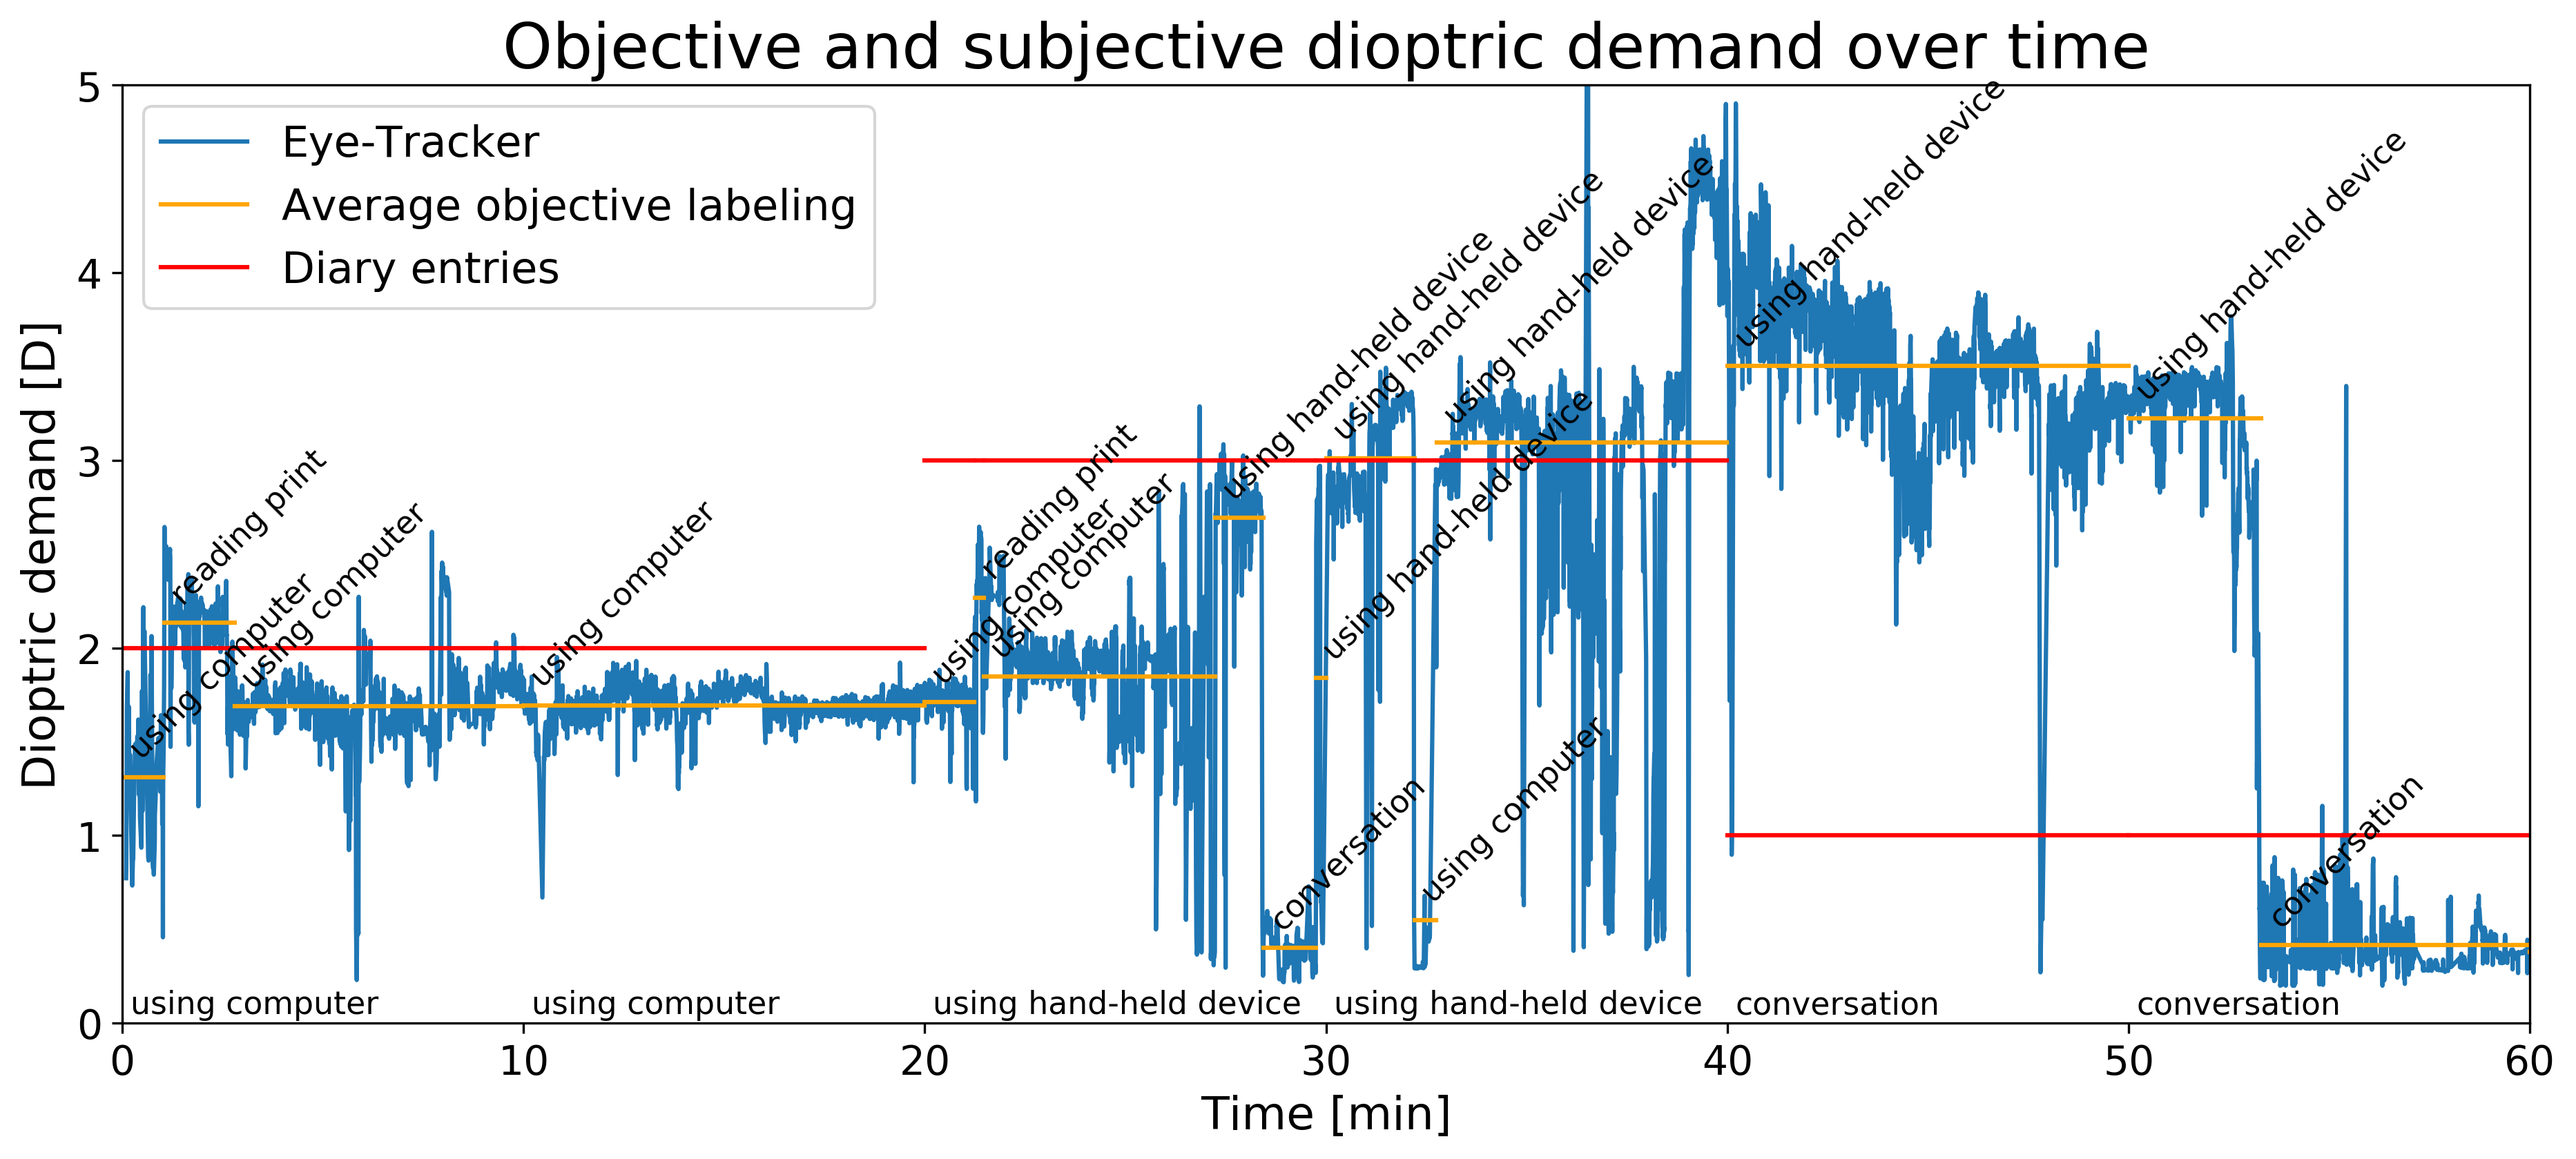

In [10]:
# find each participant data 
log_quest = pd.read_excel(fp_fn_logbook, sheet_name='questionnaire',header=None, index_col=0, engine='xlrd')
log_quest.columns = np.arange(len(log_quest.columns))

# # find annotation file and export info file 
annotation_fp = r'exports\001'

px_ids = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 21,]
px_ids = 12, 
for px_id in px_ids:
    # # find annotation file and export info file 
    px_meta_data = get_px_meta(fp_fn_logbook, [px_id,], rec_ident, path_tracking)
    fpn = os.path.join(px_meta_data.rec_fp[0], annotation_fp, 'annotations.csv')
    annotations = pd.read_csv(fpn)
    
    start_time, rec_duration = pupil_rec_sync_time(os.path.join(px_meta_data.rec_fp[0]))

    annotations.timestamp = annotations.timestamp - start_time
        # add end timestamp of recording 
    annotations = annotations.append(pd.DataFrame({'timestamp': rec_duration,
                                                   'added_in_player': False,
    #                                                'duration' : 0,
                                                   'label' : 'end'
                                                  }, index=[len(annotations)]))

    # estimate durations for annotated data 
    for idx in annotations.index[:-1]:
        annotations.loc[idx, 'duration'] = int(annotations.loc[idx +1, 'timestamp'] - annotations.loc[idx, 'timestamp'])


    # delete every data with very short durations (<10 seconds)  
    annotations = annotations.drop(annotations[annotations.duration < 10].index)    

    # add anotations for 10 min interval 



    for matching_time in range(0, 3601, 600):
        new_df = pd.DataFrame({'timestamp': matching_time,
                               'added_in_player': False,}, index=[0])
        annotations = annotations.append(new_df)

    annotations = annotations.sort_values('timestamp', inplace=False) 
    annotations = annotations.reset_index(drop=True,)

    # calculate final durations for annotated data 
    for idx in annotations.index[:-1]:
        annotations.loc[idx, 'duration'] = int(annotations.loc[idx +1, 'timestamp'] - annotations.loc[idx, 'timestamp'])

    # replace any nan lable with previous none nan lable
    for idx in annotations.index[1:]:
        if pd.isna(annotations.label[idx]):
            annotations.loc[idx, 'label'] = annotations.loc[idx -1, 'label']

    # get DtPoR for the 1 hour recording and average accros time 
    fpn = os.path.join(px_meta_data.px_rec_fp[0], dd_1hour_fn)

    dd_1hour = pd.read_csv(fpn)

    annotations['objective_avg'] = 0

    for idx in annotations.index:
        annotations.loc[idx, 'objective_avg'] = np.nanmean(1/ dd_1hour.loc[(dd_1hour.frame_timestamp >= annotations.loc[idx, 'timestamp'])&
                                                                        (dd_1hour.frame_timestamp <= (annotations.loc[idx, 'timestamp'] +
                                                                         annotations.loc[idx, 'duration'])), 
                                                                         'depth_mean'
                                                                          ])
        annotations.loc[idx, 'objective_avg_n'] = len(dd_1hour.loc[(dd_1hour.frame_timestamp >= annotations.loc[idx, 'timestamp'])&
                                                                        (dd_1hour.frame_timestamp <= (annotations.loc[idx, 'timestamp'] +
                                                                         annotations.loc[idx, 'duration'])), 
                                                                         'depth_mean'
                                                                        ])
        
#     annotations.loc[(annotations.label == 'end'), ['objective_avg', 'diary_entry',]] = np.nan
    annotations.loc[:, 'px_id'] = px_id
    
    # get individual tasks     
    tasks_list = list()
    idents = ['0-10min_type', '10-20min_type', '20-30min_type', '30-40min_type', '40-50min_type', '50-60min_type' ]    
    [[px_col_idx]] = np.where(log_quest.loc['px_id', :] == px_id)
    for ident in idents: 
        task = (log_quest.loc[ident, px_col_idx])
        tasks_list.append(task.strip()) 
    
    # get individual estimates 
    estimates_list = []
    idents = ['0-10min_eavg', '10-20min_eavg', '20-30min_eavg', '30-40min_eavg', '40-50min_eavg', '50-60min_eavg' ]
    [[px_col_idx]] = np.where(log_quest.loc['px_id', :] == px_id)
    for ident in idents: 
        estimates_list.append( 100 / (log_quest.loc[ident, px_col_idx]))
    for idx, [task, estimate] in enumerate(zip(tasks_list, estimates_list)):
        start_time = 600 * idx
        end_time = 600 * (idx +1)
        annotations.loc[(annotations.timestamp >= start_time) &
                       (annotations.timestamp <   end_time),
                        'diary_entry'
                       ] = task
        
        annotations.loc[(annotations.timestamp >= start_time) &
                       (annotations.timestamp <   end_time),
                        'subj_class'] = PoR_Data.dioptric_translation_lib(task)
        annotations.loc[(annotations.timestamp >= start_time) &
                       (annotations.timestamp <   end_time),
                        'sub_estimate'
                       ] = estimate
    annotations.loc[(annotations.label == 'end'), ['objective_avg', 'diary_entry','subj_class', 'sub_estimate' ]] = np.nan
    
    annotations_output_fn = os.path.join(px_meta_data.rec_fp[0], annotation_fp, 'annotations_dioptric_demand.csv')

    annotations.to_csv(annotations_output_fn)
    plot_dioptric_demand_obj_vs_sub(dd_1hour, annotations)
# annotations    

In [2]:
def plot_dioptric_demand_obj_vs_sub(display_data, annoataions):
    plt.figure(figsize=(15,6), dpi=300, facecolor='w', edgecolor='k', )

#     display_data = dd_1hour #.sort_values(by=['frame_timestamp'],).reset_index()
    plt.plot(display_data.frame_timestamp /60, 1/display_data.depth_mean,) 
    # plt.plot(display_data.frame_timestamp, display_data.obj_class_DH)

    for idx in annotations.index:
        plt.plot([annotations.timestamp[idx] /60, (annotations.timestamp[idx] + annotations.duration[idx])/60],
                [annotations.objective_avg[idx], annotations.objective_avg[idx]], 'orange' )
        plt.plot([annotations.timestamp[idx] /60, (annotations.timestamp[idx] + annotations.duration[idx])/60],
                [annotations.subj_class[idx], annotations.subj_class[idx]], 'r' )
        if annotations.timestamp[idx] < 3600:
            plt.text(int(annotations.timestamp[idx])/60 + 0.05, annotations.objective_avg[idx] + 0.1, 
                  annotations.loc[idx, 'label'], size=11, rotation=45)

    for ts in range(0, 3001, 600):
        if float(ts) in list(annotations.timestamp):
#             plt.plot(annotations.timestamp[idx], [df.D_value[idx], df.D_value[idx]], 'green',)
            plt.text(int(ts /60) +0.2 , 0.05 ,
                     annotations.loc[annotations.timestamp == ts, 'diary_entry'].item(), size=11)

            
            
    plt.title('Objective and subjective dioptric demand over time', size=22)
    plt.legend(['Eye-Tracker', 'Average objective labeling','Diary entries'], fontsize=15, loc='upper left' )
    plt.ylabel('Dioptric demand [D]', size=16)
    plt.xlabel('Time [min]', size=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlim([0, 60])
    plt.ylim([0, 5])


    output_fp = r'E:\studyII\analyses\dioptric_demand_PoR_ob_vs_sb'
    fig_output_fn = (os.path.join(output_fp, 'px_id_' + str(px_id) + '_OBJ_vs_SUB_near_work.png'))
    output_fpn = os.path.join(output_fp, fig_output_fn)

    plt.savefig(output_fpn, dpi=300, bbox_inches='tight')

In [ ]:
# pool all annotations_dioptric landscape files 

# check recordings with more than one folder 

# 

In [52]:
# find each participant data 
log_quest = pd.read_excel(fp_fn_logbook, sheet_name='questionnaire',header=None, index_col=0, engine='xlrd')
log_quest.columns = np.arange(len(log_quest.columns))

# # find annotation file and export info file 
annotation_fp = r'exports\001'

df_all = pd.DataFrame(columns=['px_id',])

px_ids = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 21,]
# px_ids = 2, 
for px_id in px_ids:
    # # find annotation file and export info file 
    px_meta_data = get_px_meta(fp_fn_logbook, [px_id,], rec_ident, path_tracking)
    fpn = os.path.join(px_meta_data.rec_fp[0], annotation_fp, 'annotations_dioptric_demand.csv')
    df_new = pd.read_csv(fpn)
    df_all = df_all.append(df_new)

In [8]:
annotations


,added_in_player,duration,index,label,timestamp,objective_avg,objective_avg_n,px_id,diary_entry,subj_class,sub_estimate
0,False,0.0,NaN,NaN,0.000000,NaN,0.0,12,using computer,2.0,1.538462
1,True,62.0,0.0,using computer,0.078083,1.311124,122.0,12,using computer,2.0,1.538462
2,True,105.0,314.0,reading print,62.917873,2.133733,434.0,12,using computer,2.0,1.538462
3,True,431.0,826.0,using computer,168.181553,1.689618,1828.0,12,using computer,2.0,1.538462
4,False,600.0,NaN,using computer,600.000000,1.693818,2644.0,12,using computer,2.0,1.538462
5,False,74.0,NaN,using computer,1200.000000,1.711382,332.0,12,using hand-held device,3.0,3.571429
6,True,13.0,6214.0,reading print,1274.859272,2.267810,58.0,12,using hand-held device,3.0,3.571429
7,True,346.0,6280.0,using computer,1288.067165,1.848023,1411.0,12,using hand-held device,3.0,3.571429
8,True,72.0,8000.0,using hand-held device,1634.278766,2.692167,231.0,12,using hand-held device,3.0,3.571429
9,True,78.0,8361.0,conversation,1706.722692,0.402987,201.0,12,using hand-held device,3.0,3.571429


In [54]:
    output_fp = r'E:\studyII\analyses'
    fig_output_fn = (os.path.join(output_fp, 'dioptric_demand_OBJ_vs_SUB_near_work.csv'))
    output_fpn = os.path.join(output_fp, fig_output_fn)

df_all.to_csv(output_fpn)

In [31]:
test = 0

if annotations.timestamp.any() == test:
    annotations.loc[annotations.timestamp == test, 'diary_entry'].item()


In [48]:
for ts in range(0, 3001, 600):
    if float(ts) in list(annotations.timestamp):
        print(annotations.loc[annotations.timestamp == ts, 'diary_entry'].item())
    else:
        print('nope')

using computer
using computer
using hand-held device
using hand-held device
conversation
conversation


In [45]:
list(annotations.timestamp)

[0.0,
 0.07808346649153464,
 62.91787261863692,
 168.1815525998686,
 600.0,
 1200.0,
 1274.8592724313344,
 1288.0671646108253,
 1634.2787656297292,
 1706.7226924409492,
 1784.9705895890806,
 1800.0,
 1932.4614724626158,
 1965.0802955140693,
 2400.0,
 3000.0,
 3198.234621476135,
 3600.0,
 3608.0]